In [1]:
#import
import os
import gzip
from collections import Counter
#basics
import pandas as pd
import numpy as np

#plotting libraries
%matplotlib inline
import seaborn as sns
from seaborn import plt

# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

#for AWS connection
#from boto.s3.connection import S3Connection
#from IPython.parallel import Client

#### Connect to data on local machine

In [20]:
train_df = pd.read_csv("/Users/rychughes/GA/data/train/base_features.csv")
print train_df.shape
train_df.head(10)

(311296, 44)


repeattrue   repeattrips       id    offer_id   offer_value  \
0           1             5     86246    1208251          2.00   
1           1            16     86252    1197502          0.75   
2           0             0  12262064          0          0.00   
3           0             0  12277270          0          0.00   
4           0             0  12332190          0          0.00   
5           0             0  12524696          0          0.00   
6           0             0  12682470    1197502          0.75   
7           0             0  12996040    1197502          0.75   
8           0             0  13074629          0          0.00   
9           0             0  13089312    1204821          1.50   

    purchases_total_quantity   purchases_total_amount  \
0                       1254                  4140.41   
1                       1308                  4134.54   
2                          0                     0.00   
3                          0                     0.00   
4                          0                     0.00   
5                          0                     0.00   
6                         77                   340.57   
7                         27                   110.68   
8                          0                     0.00   
9                         86                   251.17   

    purchases_avg_price_per_item   purchases_quantity_30  \
0                       3.301762                     375   
1                       3.160963                     826   
2                       0.000000                       0   
3                       0.000000                       0   
4                       0.000000                       0   
5                       0.000000                       0   
6                       4.422987                       2   
7                       4.099259                       3   
8                       0.000000                       0   
9                       2.920581                       8   

    purchases_quantity_60        ...          brand_buy_true  \
0                     775        ...                       1   
1                     859        ...                       1   
2                       0        ...                       0   
3                       0        ...                       0   
4                       0        ...                       0   
5                       0        ...                       0   
6                       6        ...                       0   
7                       7        ...                       0   
8                       0        ...                       0   
9                      15        ...                       1   

    brand_total_quantity   brand_total_amount   brand_share_wallet  \
0                      9                28.71             0.006934   
1                      2                 4.98             0.001204   
2                      0                 0.00             0.000000   
3                      0                 0.00             0.000000   
4                      0                 0.00             0.000000   
5                      0                 0.00             0.000000   
6                      0                 0.00             0.000000   
7                      0                 0.00             0.000000   
8                      0                 0.00             0.000000   
9                      5                19.95             0.079428   

    brand_quantity_30   brand_quantity_60   brand_quantity_90  \
0                   1                   5                   6   
1                   1                   1                   1   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   
5                   0                   0                   0   
6                   0                   0               

In [ ]:
train_df.info()

In [4]:
cols = train_df.columns.values
print cols #note there is a space before the letters (fix this in next feature_generator script

['repeattrue' ' repeattrips' ' id ' ' offer_id' ' offer_value'
 ' purchases_total_quantity' ' purchases_total_amount'
 ' purchases_avg_price_per_item' ' purchases_quantity_30'
 ' purchases_quantity_60' ' purchases_quantity_90' ' purchases_amount_30'
 ' purchases_amount_60' ' purchases_amount_90' ' company_buy_true'
 ' company_total_quantity' ' company_total_amount' ' company_share_wallet'
 ' company_quantity_30' ' company_quantity_60' ' company_quantity_90'
 ' company_amount_30' ' company_amount_60' ' company_amount_90'
 ' category_buy_true' ' category_total_quantity' ' category_total_amount'
 ' category_share_wallet' ' category_quantity_30' ' category_quantity_60'
 ' category_quantity_90' ' category_amount_30' ' category_amount_60'
 ' category_amount_90' ' brand_buy_true' ' brand_total_quantity'
 ' brand_total_amount' ' brand_share_wallet' ' brand_quantity_30'
 ' brand_quantity_60' ' brand_quantity_90' ' brand_amount_30'
 ' brand_amount_60' ' brand_amount_90']


In [21]:
zero_transactions_mask_list = list(train_df[' purchases_total_quantity'] <= 0)
zero_transactions_mask_list

[False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 F

In [22]:
Counter(zero_transactions_mask_list)

Counter({False: 159960, True: 151336})

In [25]:
#use mask to reduce dataset 
zero_transactions_mask = train_df[' purchases_total_quantity'] <= 0
#train_df[zero_transactions_mask].head()

train_df[' zero_transactions_true'] = 0
train_df.loc[zero_transactions_mask,' zero_transactions_true'] = 1
train_df.head(7) #confirm: zero transactions are marked, but customers with transactions BUT who did not repeat are still unique

repeattrue   repeattrips       id    offer_id   offer_value  \
0           1             5     86246    1208251          2.00   
1           1            16     86252    1197502          0.75   
2           0             0  12262064          0          0.00   
3           0             0  12277270          0          0.00   
4           0             0  12332190          0          0.00   
5           0             0  12524696          0          0.00   
6           0             0  12682470    1197502          0.75   

    purchases_total_quantity   purchases_total_amount  \
0                       1254                  4140.41   
1                       1308                  4134.54   
2                          0                     0.00   
3                          0                     0.00   
4                          0                     0.00   
5                          0                     0.00   
6                         77                   340.57   

    purchases_avg_price_per_item   purchases_quantity_30  \
0                       3.301762                     375   
1                       3.160963                     826   
2                       0.000000                       0   
3                       0.000000                       0   
4                       0.000000                       0   
5                       0.000000                       0   
6                       4.422987                       2   

    purchases_quantity_60           ...              brand_total_quantity  \
0                     775           ...                                 9   
1                     859           ...                                 2   
2                       0           ...                                 0   
3                       0           ...                                 0   
4                       0           ...                                 0   
5                       0           ...                                 0   
6                       6           ...                                 0   

    brand_total_amount   brand_share_wallet   brand_quantity_30  \
0                28.71             0.006934                   1   
1                 4.98             0.001204                   1   
2                 0.00             0.000000                   0   
3                 0.00             0.000000                   0   
4                 0.00             0.000000                   0   
5                 0.00             0.000000                   0   
6                 0.00             0.000000                   0   

    brand_quantity_60   brand_quantity_90   brand_amount_30   brand_amount_60  \
0                   5                   6              4.59             14.95   
1                   1                   1              1.99              1.99   
2                   0                   0              0.00              0.00   
3                   0                   0              0.00              0.00   
4                   0                   0              0.00              0.00   
5                   0                   0              0.00              0.00   
6                   0                   0              0.00              0.00   

    brand_amount_90   zero_transactions_true  
0             20.64                        0  
1              1.99                        0  
2              0.00                        1  
3              0.00                        1  
4              0.00                        1  
5              0.00                        1  
6              0.00                        0  

[7 rows x 45 columns]

In [38]:
#remove zero_transactions from train_df
train_df = train_df[zero_transactions_mask==False]
train_df.head()

repeattrue   repeattrips       id    offer_id   offer_value  \
0           1             5     86246    1208251          2.00   
1           1            16     86252    1197502          0.75   
6           0             0  12682470    1197502          0.75   
7           0             0  12996040    1197502          0.75   
9           0             0  13089312    1204821          1.50   

    purchases_total_quantity   purchases_total_amount  \
0                       1254                  4140.41   
1                       1308                  4134.54   
6                         77                   340.57   
7                         27                   110.68   
9                         86                   251.17   

    purchases_avg_price_per_item   purchases_quantity_30  \
0                       3.301762                     375   
1                       3.160963                     826   
6                       4.422987                       2   
7                       4.099259                       3   
9                       2.920581                       8   

    purchases_quantity_60           ...              brand_total_quantity  \
0                     775           ...                                 9   
1                     859           ...                                 2   
6                       6           ...                                 0   
7                       7           ...                                 0   
9                      15           ...                                 5   

    brand_total_amount   brand_share_wallet   brand_quantity_30  \
0                28.71             0.006934                   1   
1                 4.98             0.001204                   1   
6                 0.00             0.000000                   0   
7                 0.00             0.000000                   0   
9                19.95             0.079428                   2   

    brand_quantity_60   brand_quantity_90   brand_amount_30   brand_amount_60  \
0                   5                   6              4.59             14.95   
1                   1                   1              1.99              1.99   
6                   0                   0              0.00              0.00   
7                   0                   0              0.00              0.00   
9                   5                   5              7.98             19.95   

    brand_amount_90   zero_transactions_true  
0             20.64                        0  
1              1.99                        0  
6              0.00                        0  
7              0.00                        0  
9             19.95                        0  

[5 rows x 45 columns]

In [39]:
#y_train, X_train = train_df['repeattrue','repeattrips'], train_df[2:]
y_train = train_df_reduced.ix[:,0:3]
y_train.head()

repeattrue   repeattrips       id 
0           1             5     86246
1           1            16     86252
6           0             0  12682470
7           0             0  12996040
9           0             0  13089312

In [40]:
#y_train, X_train = train_df['repeattrue','repeattrips'], train_df[2:]
X_train = train_df.ix[:,3:] #[:,2:] if desire to include 
X_train.head()

offer_id   offer_value   purchases_total_quantity  \
0    1208251          2.00                       1254   
1    1197502          0.75                       1308   
6    1197502          0.75                         77   
7    1197502          0.75                         27   
9    1204821          1.50                         86   

    purchases_total_amount   purchases_avg_price_per_item  \
0                  4140.41                       3.301762   
1                  4134.54                       3.160963   
6                   340.57                       4.422987   
7                   110.68                       4.099259   
9                   251.17                       2.920581   

    purchases_quantity_30   purchases_quantity_60   purchases_quantity_90  \
0                     375                     775                     813   
1                     826                     859                     892   
6                       2                       6                      19   
7                       3                       7                       7   
9                       8                      15                      24   

    purchases_amount_30   purchases_amount_60           ...             \
0               1143.77               2320.14           ...              
1               2505.17               2629.46           ...              
6                  9.48                 41.76           ...              
7                  7.97                 20.63           ...              
9                 19.25                 49.68           ...              

    brand_total_quantity   brand_total_amount   brand_share_wallet  \
0                      9                28.71             0.006934   
1                      2                 4.98             0.001204   
6                      0                 0.00             0.000000   
7                      0                 0.00             0.000000   
9                      5                19.95             0.079428   

    brand_quantity_30   brand_quantity_60   brand_quantity_90  \
0                   1                   5                   6   
1                   1                   1                   1   
6                   0                   0                   0   
7                   0                   0                   0   
9                   2                   5                   5   

    brand_amount_30   brand_amount_60   brand_amount_90  \
0              4.59             14.95             20.64   
1              1.99              1.99              1.99   
6              0.00              0.00              0.00   
7              0.00              0.00              0.00   
9              7.98             19.95             19.95   

    zero_transactions_true  
0                        0  
1                        0  
6                        0  
7                        0  
9                        0  

[5 rows x 42 columns]

In [62]:
train_df.describe().T

count          mean           std  \
repeattrue                     311296  1.394975e-01  3.464654e-01   
 repeattrips                   311296  3.373959e-01  4.877307e+00   
 id                            311296  2.109791e+09  1.618401e+09   
 offer_id                      311296  6.180161e+05  6.007613e+05   
 offer_value                   311296  6.454412e-01  7.315519e-01   
 purchases_total_quantity      311296  7.640496e+01  3.257303e+03   
 purchases_total_amount        311296  2.663150e+02  9.767568e+03   
 purchases_avg_price_per_item  311296  1.858482e+00  1.989205e+00   
 purchases_quantity_30         311296  5.300910e+00  2.041233e+02   
 purchases_quantity_60         311296  1.122020e+01  4.326968e+02   
 purchases_quantity_90         311296  1.741968e+01  6.674041e+02   
 purchases_amount_30           311296  1.865183e+01  6.169747e+02   
 purchases_amount_60           311296  3.916162e+01  1.291478e+03   
 purchases_amount_90           311296  6.008626e+01  1.959913e+03   
 company_buy_true              311296  2.784552e-01  4.482394e-01   
 company_total_quantity        311296  3.190250e+00  7.751373e+01   
 company_total_amount          311296  7.714300e+00  1.997557e+02   
 company_share_wallet          311296  1.786488e-02  5.355481e-02   
 company_quantity_30           311296  2.671605e-01  5.174422e+00   
 company_quantity_60           311296  5.732968e-01  1.129417e+01   
 company_quantity_90           311296  8.840846e-01  1.767585e+01   
 company_amount_30             311296  7.259571e-01  1.216374e+01   
 company_amount_60             311296  1.479439e+00  2.652168e+01   
 company_amount_90             311296  2.211899e+00  3.975727e+01   
 category_buy_true             311296  2.810990e-01  4.495364e-01   
 category_total_quantity       311296  4.436543e+00  7.673656e+01   
 category_total_amount         311296  1.437014e+01  2.515293e+02   
 category_share_wallet         311296  3.645163e-02  1.009395e-01   
 category_quantity_30          311296  3.237176e-01  5.120629e+00   
 category_quantity_60          311296  6.730058e-01  1.307020e+01   
 category_quantity_90          311296  1.003652e+00  1.779953e+01   
 category_amount_30            311296  1.079182e+00  2.214906e+01   
 category_amount_60            311296  2.248408e+00  5.888260e+01   
 category_amount_90            311296  3.325096e+00  7.664251e+01   
 brand_buy_true                311296  1.700472e-01  3.756748e-01   
 brand_total_quantity          311296  1.320859e+00  3.940512e+01   
 brand_total_amount            311296  4.065293e+00  1.115783e+02   
 brand_share_wallet            311296  8.528444e-03  3.524399e-02   
 brand_quantity_30             311296  1.347592e-01  3.159824e+00   
 brand_quantity_60             311296  2.624897e-01  6.359571e+00   
 brand_quantity_90             311296  3.814183e-01  9.152776e+00   
 brand_amount_30               311296  4.678094e-01  9.115442e+00   
 brand_amount_60               311296  9.009982e-01  1.931792e+01   
 brand_amount_90               311296  1.297409e+00  2.752276e+01   

                                        min           25%           50%  \
repeattrue                         0.000000  0.000000e+00  0.000000e+00   
 repeattrips                       0.000000  0.000000e+00  0.000000e+00   
 id                            86246.000000  5.566205e+08  1.953395e+09   
 offer_id                          0.000000  0.000000e+00  1.194044e+06   
 offer_value                       0.000000  0.000000e+00  7.500000e-01   
 purchases_total_quantity          0.000000  0.000000e+00  1.000000e+01   
 purchases_total_amount         -371.690000  0.000000e+00  3.102000e+01   
 purchases_avg_price_per_item    -10.619714  0.000000e+00  1.972202e+00   
 purchases_quantity_30            -7.000000  0.000000e+00  0.000000e+00   
 purchases_quantity_60            -1.000000  0.000000e+00  0.000000e+00   
 purchases_quantity_90            -1.000000  0.000000e+00  1.000000e+00   
 purchases_amount_30      

In [44]:
train_df.corr()

repeattrue   repeattrips       id    offer_id  \
repeattrue                       1.000000      0.158447  0.045533   0.138179   
 repeattrips                     0.158447      1.000000  0.017876   0.036256   
 id                              0.045533      0.017876  1.000000   0.114877   
 offer_id                        0.138179      0.036256  0.114877   1.000000   
 offer_value                    -0.044266     -0.017484 -0.045820   0.413503   
 purchases_total_quantity        0.012811      0.268222 -0.002854   0.007485   
 purchases_total_amount          0.014648      0.241106 -0.002535   0.008712   
 purchases_avg_price_per_item    0.030583      0.004963  0.125589   0.079817   
 purchases_quantity_30           0.014535      0.371347 -0.001032   0.006144   
 purchases_quantity_60           0.014230      0.367826 -0.000655   0.005686   
 purchases_quantity_90           0.013974      0.345188 -0.001013   0.005750   
 purchases_amount_30             0.016662      0.343921 -0.000378   0.007331   
 purchases_amount_60             0.016291      0.332309  0.000003   0.007070   
 purchases_amount_90             0.016143      0.315314 -0.000226   0.007285   
 company_buy_true               -0.005274      0.009675 -0.060597   0.081122   
 company_total_quantity          0.006407      0.549149 -0.004934  -0.006246   
 company_total_amount            0.011501      0.300496 -0.002554   0.008254   
 company_share_wallet           -0.031851      0.003403 -0.010914  -0.002368   
 company_quantity_30             0.017540      0.611581 -0.000998  -0.002556   
 company_quantity_60             0.014338      0.590509 -0.002106  -0.003850   
 company_quantity_90             0.011986      0.624154 -0.003960  -0.006407   
 company_amount_30               0.032472      0.396312  0.003943   0.021303   
 company_amount_60               0.027672      0.379695  0.002605   0.019315   
 company_amount_90               0.025134      0.399434  0.001432   0.017085   
 category_buy_true               0.127635      0.043980  0.131425   0.078605   
 category_total_quantity         0.036456      0.173006  0.014613   0.062964   
 category_total_amount           0.041494      0.164497  0.018641   0.059473   
 category_share_wallet           0.152420      0.053784  0.198609   0.260270   
 category_quantity_30            0.044438      0.251492  0.024957   0.063275   
 category_quantity_60            0.035252      0.208066  0.021155   0.052791   
 category_quantity_90            0.037881      0.221832  0.023641   0.058509   
 category_amount_30              0.039696      0.192695  0.022798   0.046392   
 category_amount_60              0.030530      0.154042  0.018943   0.036787   
 category_amount_90              0.033995      0.168443  0.021923   0.042222   
 brand_buy_true                  0.112881      0.038225 -0.000176   0.369451   
 brand_total_quantity            0.021563      0.147287  0.001475   0.023951   
 brand_total_amount              0.025591      0.153286  0.003505   0.025879   
 brand_share_wallet              0.067066      0.029999  0.029228   0.157740   
 brand_quantity_30               0.037598      0.126251  0.007312   0.028366   
 brand_quantity_60               0.035444      0.125111  0.006514   0.031987   
 brand_quantity_90               0.034838      0.117104  0.006037   0.032298   
 brand_amount_30                 0.049726      0.151757  0.012267   0.039697   
 brand_amount_60                 0.044681      0.143093  0.010640   0.039894   
 brand_amount_90                 0.043821      0.136877  0.010723   0.040473   
 zero_transactions_true               NaN           NaN       NaN        NaN   

                                offer_value   purchases_total_quantity  \
repeattrue                        -0.044266                   0.012811   
 repeattrips                      -0.017484                   0.268222   
 id                               -0.045820                  -0.002854   
 offer_id                          0.413503           

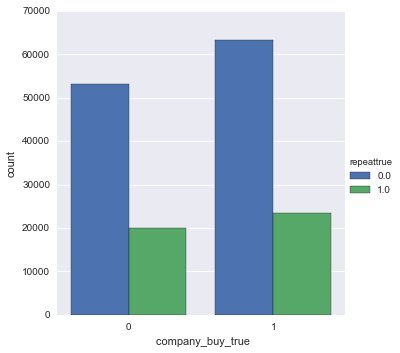

In [41]:
#train_df[' company_buy_true'].hist()
#note the space between "_varName"
sns.factorplot(" company_buy_true",data=train_df, hue="repeattrue", aspect=1)

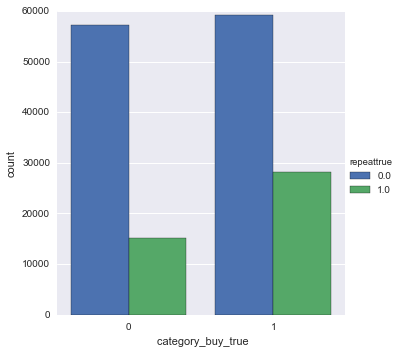

In [42]:
sns.factorplot(" category_buy_true",data=train_df, hue="repeattrue", aspect=1)

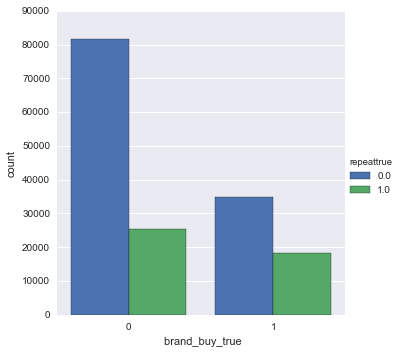

In [43]:
sns.factorplot(" brand_buy_true",data=train_df, hue="repeattrue", aspect=1)

2.23595505618


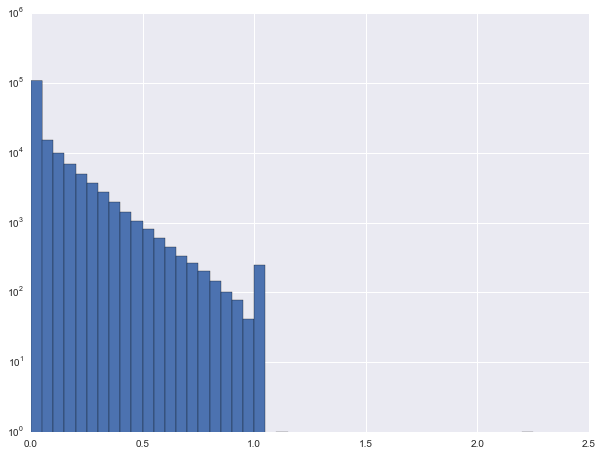

In [45]:
print max( train_df[' category_share_wallet'])
train_df[' category_share_wallet'].hist( bins=50, range=(0,2.5), log=True)

In [47]:
#how to get index value for my outliers (above 1)?

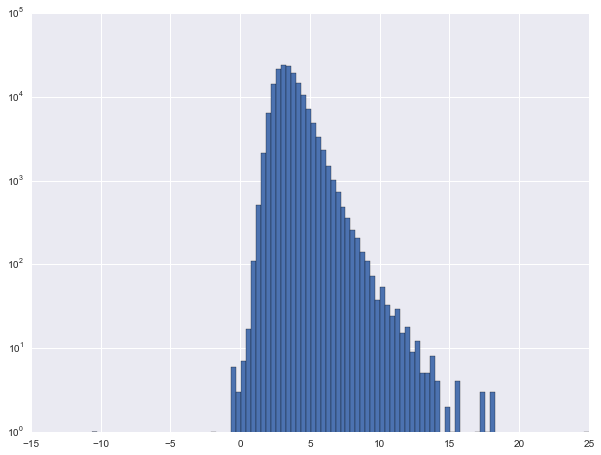

In [46]:
train_df[' purchases_avg_price_per_item'].hist( bins=100, log=True)

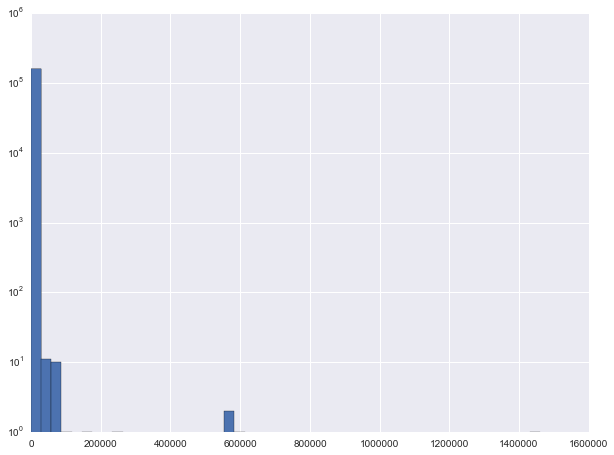

In [47]:
train_df[' purchases_total_quantity'].hist( bins=50, log=True)

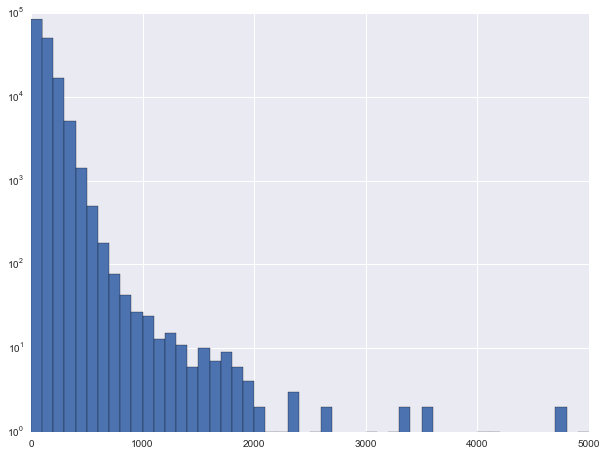

In [48]:
train_df[' purchases_total_quantity'].hist( bins=50, log=True, range=(0,5000))

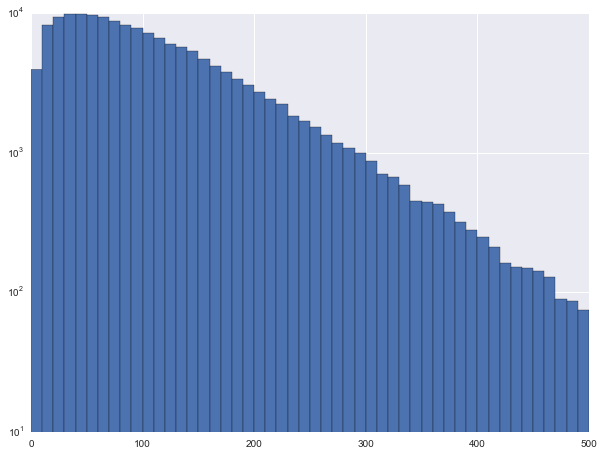

In [51]:
train_df[' purchases_total_quantity'].hist( bins=50, log=True, range=(0,500))
#does this indicate that I can delete a good share of my dataset?

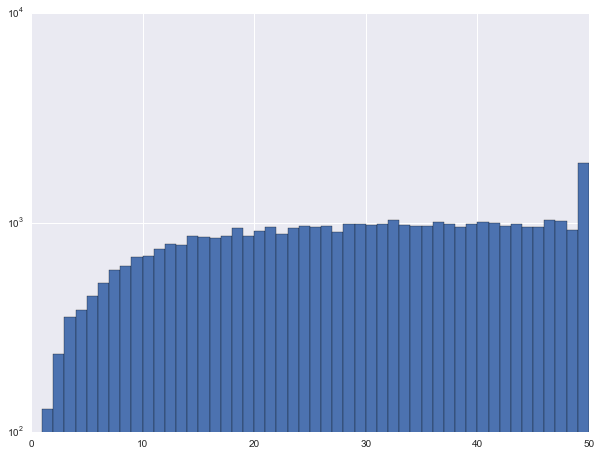

In [50]:
train_df[' purchases_total_quantity'].hist( bins=50, log=True, range=(0,50))
#does this indicate that I can delete a good share of my dataset?

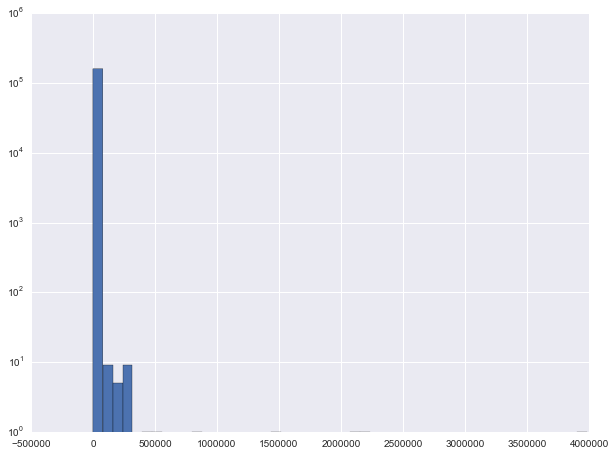

In [52]:
train_df[' purchases_total_amount'].hist( bins=50, log=True)

In [53]:
sns.pairplot?

In [54]:
sns.pairplot(train_df, hue='repeattrue')

###Load Test Data

In [57]:
test_df = pd.read_csv("/Users/rychughes/GA/data/test/base_features.csv")
print test_df.shape
test_df.head(10)

(311445, 44)


repeattrue   repeattrips       id    offer_id   offer_value  \
0        -999          -999     86246          0           0.0   
1        -999          -999     86252          0           0.0   
2        -999          -999  12262064    1219903           1.5   
3        -999          -999  12277270    1221658           3.0   
4        -999          -999  12332190    1213242           2.0   
5        -999          -999  12524696    1221665           1.5   
6        -999          -999  12682470          0           0.0   
7        -999          -999  12996040          0           0.0   
8        -999          -999  13074629    1221658           3.0   
9        -999          -999  13089312          0           0.0   

    purchases_total_quantity   purchases_total_amount  \
0                          0                     0.00   
1                          0                     0.00   
2                         66                   218.37   
3                        206                  1101.14   
4                        118                   390.68   
5                         87                   376.41   
6                          0                     0.00   
7                          0                     0.00   
8                        177                   666.84   
9                          0                     0.00   

    purchases_avg_price_per_item   purchases_quantity_30  \
0                       0.000000                       0   
1                       0.000000                       0   
2                       3.308636                       7   
3                       5.345340                      16   
4                       3.310847                       2   
5                       4.326552                      12   
6                       0.000000                       0   
7                       0.000000                       0   
8                       3.767458                      10   
9                       0.000000                       0   

    purchases_quantity_60        ...          brand_buy_true  \
0                       0        ...                       0   
1                       0        ...                       0   
2                      16        ...                       1   
3                      25        ...                       1   
4                       9        ...                       0   
5                      19        ...                       0   
6                       0        ...                       0   
7                       0        ...                       0   
8                      21        ...                       0   
9                       0        ...                       0   

    brand_total_quantity   brand_total_amount   brand_share_wallet  \
0                      0                 0.00             0.000000   
1                      0                 0.00             0.000000   
2                      3                 6.79             0.031094   
3                      5                26.20             0.023794   
4                      0                 0.00             0.000000   
5                      0                 0.00             0.000000   
6                      0                 0.00             0.000000   
7                      0                 0.00             0.000000   
8                      0                 0.00             0.000000   
9                      0                 0.00             0.000000   

    brand_quantity_30   brand_quantity_60   brand_quantity_90  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   1                   1   
3                   0                   0                   0   
4                   0                   0                   0   
5                   0                   0                   0   
6                   0                   0               

In [56]:
#use mask to reduce dataset 
zero_transactions_mask_test = test_df[' purchases_total_quantity'] <= 0
test_df[' zero_transactions_true'] = 0
test_df.loc[zero_transactions_mask_test,' zero_transactions_true'] = 1
test_df.head(7) #confirm: zero transactions are marked, but customers with transactions BUT who did not repeat are still unique

repeattrue   repeattrips       id    offer_id   offer_value  \
0        -999          -999     86246          0           0.0   
1        -999          -999     86252          0           0.0   
2        -999          -999  12262064    1219903           1.5   
3        -999          -999  12277270    1221658           3.0   
4        -999          -999  12332190    1213242           2.0   
5        -999          -999  12524696    1221665           1.5   
6        -999          -999  12682470          0           0.0   

    purchases_total_quantity   purchases_total_amount  \
0                          0                     0.00   
1                          0                     0.00   
2                         66                   218.37   
3                        206                  1101.14   
4                        118                   390.68   
5                         87                   376.41   
6                          0                     0.00   

    purchases_avg_price_per_item   purchases_quantity_30  \
0                       0.000000                       0   
1                       0.000000                       0   
2                       3.308636                       7   
3                       5.345340                      16   
4                       3.310847                       2   
5                       4.326552                      12   
6                       0.000000                       0   

    purchases_quantity_60           ...              brand_total_quantity  \
0                       0           ...                                 0   
1                       0           ...                                 0   
2                      16           ...                                 3   
3                      25           ...                                 5   
4                       9           ...                                 0   
5                      19           ...                                 0   
6                       0           ...                                 0   

    brand_total_amount   brand_share_wallet   brand_quantity_30  \
0                 0.00             0.000000                   0   
1                 0.00             0.000000                   0   
2                 6.79             0.031094                   0   
3                26.20             0.023794                   0   
4                 0.00             0.000000                   0   
5                 0.00             0.000000                   0   
6                 0.00             0.000000                   0   

    brand_quantity_60   brand_quantity_90   brand_amount_30   brand_amount_60  \
0                   0                   0                 0              0.00   
1                   0                   0                 0              0.00   
2                   1                   1                 0              2.79   
3                   0                   0                 0              0.00   
4                   0                   0                 0              0.00   
5                   0                   0                 0              0.00   
6                   0                   0                 0              0.00   

    brand_amount_90   zero_transactions_true  
0              0.00                        1  
1              0.00                        1  
2              2.79                        0  
3              0.00                        0  
4              0.00                        0  
5              0.00                        0  
6              0.00                        1  

[7 rows x 45 columns]

#### It appears that I have not separated Test and Train datasets correctly in feature Gen
Will try a test-train split on current data to explore "potential results"

In [91]:
#prepare dataset for model
model_df = train_df.drop([' repeattrips',' id ',' offer_id'], axis=1)
model_df['constant'] = 1
print model_df.shape
model_df.head(3)

(159960, 43)


repeattrue   offer_value   purchases_total_quantity  \
0           1          2.00                       1254   
1           1          0.75                       1308   
6           0          0.75                         77   

    purchases_total_amount   purchases_avg_price_per_item  \
0                  4140.41                       3.301762   
1                  4134.54                       3.160963   
6                   340.57                       4.422987   

    purchases_quantity_30   purchases_quantity_60   purchases_quantity_90  \
0                     375                     775                     813   
1                     826                     859                     892   
6                       2                       6                      19   

    purchases_amount_30   purchases_amount_60    ...      brand_total_amount  \
0               1143.77               2320.14    ...                   28.71   
1               2505.17               2629.46    ...                    4.98   
6                  9.48                 41.76    ...                    0.00   

    brand_share_wallet   brand_quantity_30   brand_quantity_60  \
0             0.006934                   1                   5   
1             0.001204                   1                   1   
6             0.000000                   0                   0   

    brand_quantity_90   brand_amount_30   brand_amount_60   brand_amount_90  \
0                   6              4.59             14.95             20.64   
1                   1              1.99              1.99              1.99   
6                   0              0.00              0.00              0.00   

    zero_transactions_true  constant  
0                        0         1  
1                        0         1  
6                        0         1  

[3 rows x 43 columns]

In [92]:
#split data for cross-validation test
from sklearn.cross_validation import train_test_split
#split data
X_train, X_test, y_train, y_test = train_test_split( 
    model_df.ix[:,1:] , train_df.ix[:,:1], 
    test_size=0.3, random_state=12)

In [93]:
#veryify X_shape
X_shape = pd.DataFrame(X_test)
print X_shape.shape
X_shape.head(3)

(47988, 42)


0    1        2         3   4   5   6       7       8       9  ...     32  \
0  2.0  183   423.85  2.316120  13  16  35   46.82   49.39   85.03 ...   3.79   
1  1.5  185  1093.85  5.912703  18  24  50  117.50  157.16  256.59 ...   0.00   
2  1.5  265   587.11  2.215509  22  46  59   43.77   96.42  124.03 ...  11.63   

         33  34  35  36  37    38    39  40  41  
0  0.008942   0   0   1   0  0.00  3.79   0   1  
1  0.000000   0   0   0   0  0.00  0.00   0   1  
2  0.019809   0   1   1   0  1.68  1.68   0   1  

[3 rows x 42 columns]

In [94]:
#verify y_shape
y_shape = pd.DataFrame(y_test)
print y_shape.shape
print sum(y_shape[0]) #13,036 repeaters in test set
y_shape.head(3)

(47988, 1)
13036.0


0
0  1
1  0
2  0

In [95]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
mdl.fit( X_train, y_train)
mdl.score( X_test, y_test)
#score 0.73985162957406014 

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.73985162957406014

In [96]:
#see prediction
y_hat = mdl.predict( X_test)
y_hat

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
confusion_matrix( y_test, y_hat)

array([[34226,   726],
       [11758,  1278]])

[[34226   726]
 [11758  1278]]


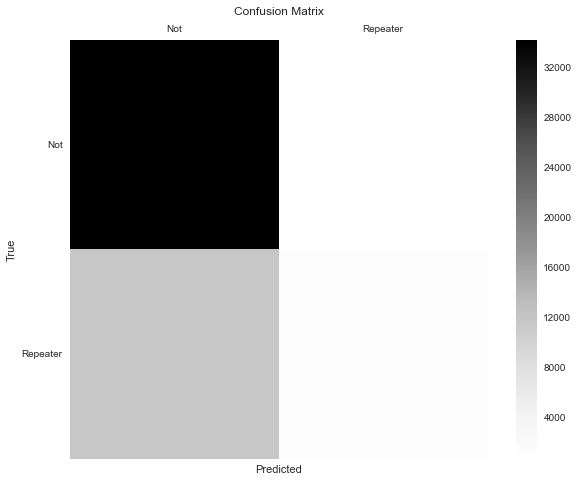

In [102]:
#confusion matrix ( true, pred, labels) 
#fmt: http://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

#lables
cm_labels = ['Not','Repeater']

cm = confusion_matrix( y_test, y_hat )
print(cm)

#fmt
fg = plt.figure()
ax = fg.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix')
plt.grid(False)  #(color='white', linestyle='dashed')
fg.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
ax.set_xticklabels(['']+ cm_labels)
ax.set_yticklabels(['']+ cm_labels)
plt.show()

#confusion_matrix?

In [101]:
#print classification_report( y_test, y_hat)
print classification_report( y_test, y_hat, target_names=["Not","Repeater"])
#classification_report?
#http://en.wikipedia.org/wiki/Precision_and_recall
#F1-score = weighted average = .66 = (.85 * 34952/47988) + (.17 * 13036/47988)
#Interpretation: model is not classifying enough "repeaters" as "repeaters"

             precision    recall  f1-score   support

        Not       0.74      0.98      0.85     34952
   Repeater       0.64      0.10      0.17     13036

avg / total       0.72      0.74      0.66     47988



In [110]:
import itertools #http://stackoverflow.com/questions/4344017/how-can-i-get-the-concatenation-of-two-lists-in-python-without-modifying-either
X_combined = list( itertools.chain( X_train , X_test)) #pd.concat(X_train, X_test)
y_combined = list(itertools.chain( y_train , y_test)) #pd.concat(y_train, y_test)
#test
print len(X_train)
print len(X_combined)

111972
159960


In [115]:
#ref HW2
from sklearn.cross_validation import cross_val_score, KFold
cv = KFold(len(X_combined), 10, shuffle=True, random_state=12) #10 folds takes ~10 mins to run
xvalidation_score = cross_val_score( mdl, X_combined, y_combined, cv=cv)
print xvalidation_score
#cross_val_score?

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

NameError: name 'scores' is not defined

In [116]:
print xvalidation_score

[ 0.69817454  0.73699675  0.74006002  0.72255564  0.7236184   0.72205551
  0.72661915  0.73443361  0.73049512  0.7348087 ]


In [117]:
print xvalidation_score.mean()
#Results ~.92

0.726981745436


#### ROC Curve

In [118]:
#reference 12-Bayes-LectureNotes
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

In [119]:
probas_ = mdl.fit( X_train, y_train).predict_proba(X_test)
probas_

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.89266406,  0.10733594],
       [ 0.77073093,  0.22926907],
       [ 0.68207954,  0.31792046],
       ..., 
       [ 0.83240062,  0.16759938],
       [ 0.79053208,  0.20946792],
       [ 0.77356471,  0.22643529]])

In [120]:
#Compute ROC cuver and area of the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:,1])
roc_auc = auc(fpr,tpr)
print 'Area under ROC curve %f' % roc_auc

Area under ROC curve 0.649056


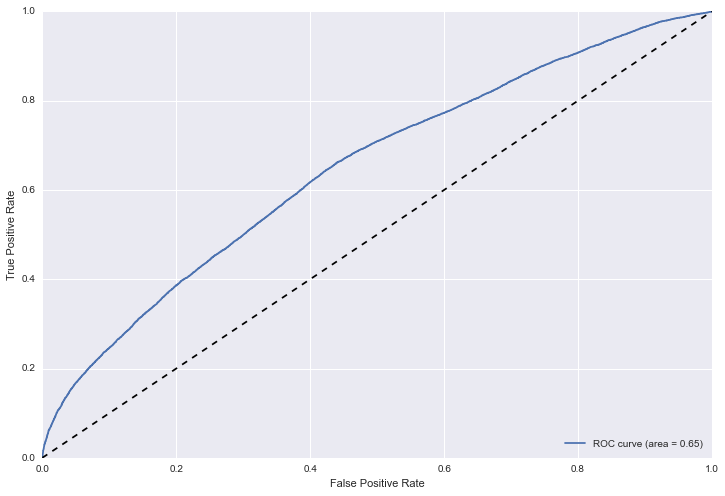

In [121]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")